# Capstone Project - Auto Ticket Assignment to the right IT Functional Groups

# Text Classification with Machine Learning

## Key Steps:
### Data Collection and Analysis
### Data Pre-processing
### Data Preparation
### Model

## 1: Model building in scikit-learn

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

# SVM
from sklearn import svm

# Feature Engineering:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Clustering:
from sklearn.cluster import KMeans

# metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Label Encoding:
from sklearn.preprocessing import LabelEncoder

# Grid Search:
import multiprocessing 

# Imputer:
from sklearn.preprocessing import Imputer

# Zscores and Scaler:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


# Decision Trees DT
#import graphviz
#from IPython.display import Image  

# PCA:
from sklearn.decomposition import PCA

# OS:
from os import system

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import tensorflow as tf
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer


import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
# import these modules 
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer


from sklearn.metrics import cohen_kappa_score
#from xgboost import XGBClassifier
#from xgboost import plot_importance

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [0]:
# Load datasets from various excel files
sn_df = pd.read_excel("Input Data.xlsx")

In [7]:
# Look at the shape / number of records in each file
print("dataset shape -", sn_df.shape)

dataset shape - (8500, 4)


In [11]:
sn_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


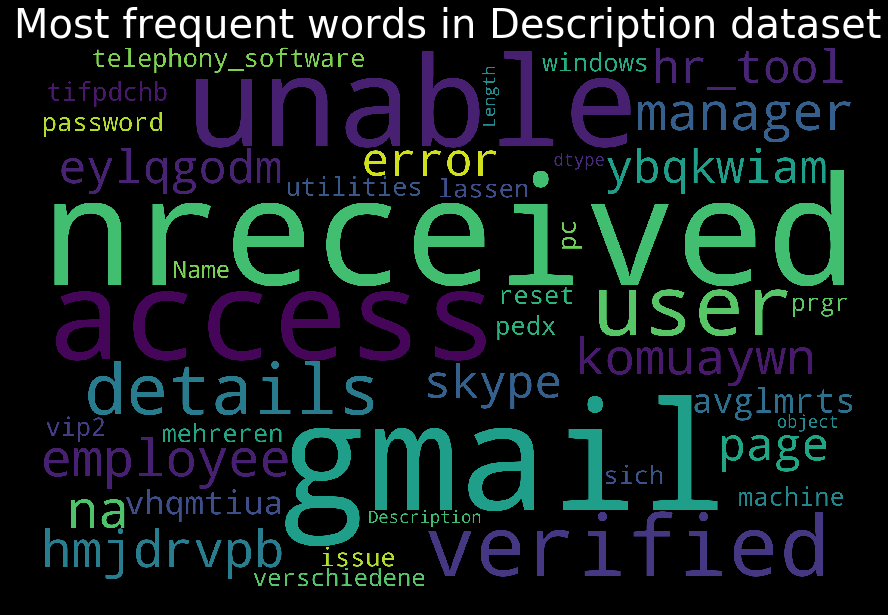

In [8]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(sn_df['Description']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Description dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

### Identifying Nan values and taking care by replacing with "THE" values

In [9]:
# Identify null values from Description
nan_rows = sn_df[sn_df['Description'].isnull()]
print("Data Set Length with Null Values in Description Column -",len(nan_rows))

Data Set Length with Null Values in Description Column - 1


In [0]:
# Replace Nan values in Description to THE - since this stop word will be eliminated in the vectorization
sn_df["Description"].fillna("The", inplace=True)

In [0]:
# Identify null values from Short Description
nan_rows = sn_inc[sn_inc['Short description'].isnull()]
print("Data Set Length with Null Values in Short Description Column -",len(nan_rows))
nan_rows = df_val[df_val['Short description'].isnull()]
print("Test Data Set Length with Null Values in Short Description Column -",len(nan_rows))

Data Set Length with Null Values in Short Description Column - 2
Test Data Set Length with Null Values in Short Description Column - 0


In [0]:
# Replace Nan values in Short description to THE - since this stop word will be eliminated in the vectorization
sn_df["Short description"].fillna("The", inplace=True)

### Convert to Lower case

In [0]:
sn_df1=sn_df.copy()

In [0]:
sn_df1['Description'] = sn_df1['Description'].apply(lambda x: x.lower())
sn_df1['Short description'] = sn_df1['Short description'].apply(lambda x: x.lower())

### Remove punctuations, digits,special characters

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
def remove_punct(text):
    text = re.sub('[0-9]+|\n|\r|[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text)
    return text

In [0]:
import re
sn_df1['Description_new'] = sn_df1['Description'].apply(lambda x: remove_punct(x))
sn_df1['Short description'] = sn_df1['Short description'].apply(lambda x: remove_punct(x))

In [18]:
sn_df1[['Description','Description_new']].head(10)

,Description,Description_new
0,-verified user details.(employee# & manager na...,verified user details employee manager na...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,received from hmjdrvpb komuaywn gmail com...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,received from eylqgodm ybqkwiam gmail com...
3,unable to access hr_tool page,unable to access hr tool page
4,skype error,skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype
6,event: critical:hostname_221.company.com the v...,event critical hostname company com the val...
7,ticket_no1550391- employment status - new non-...,ticket no employment status new non employ...
8,unable to disable add ins on outlook,unable to disable add ins on outlook
9,ticket update on inplant_874773,ticket update on inplant


In [0]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
DD=sn_df1['Description_new'].head(10)

In [0]:
#Creating a sets whith all distinct words for short description
from nltk.tokenize import word_tokenize
tokenized_word_DD=word_tokenize(str(DD))
#testing for 10 words so seprated

In [26]:
top10=tokenized_word_DD[:20]
top10

['0',
 'verified',
 'user',
 'details',
 'employee',
 'manager',
 'na',
 '...',
 '1',
 'received',
 'from',
 'hmjdrvpb',
 'komuaywn',
 'gmail',
 'com',
 '...',
 '2',
 'received',
 'from',
 'eylqgodm']

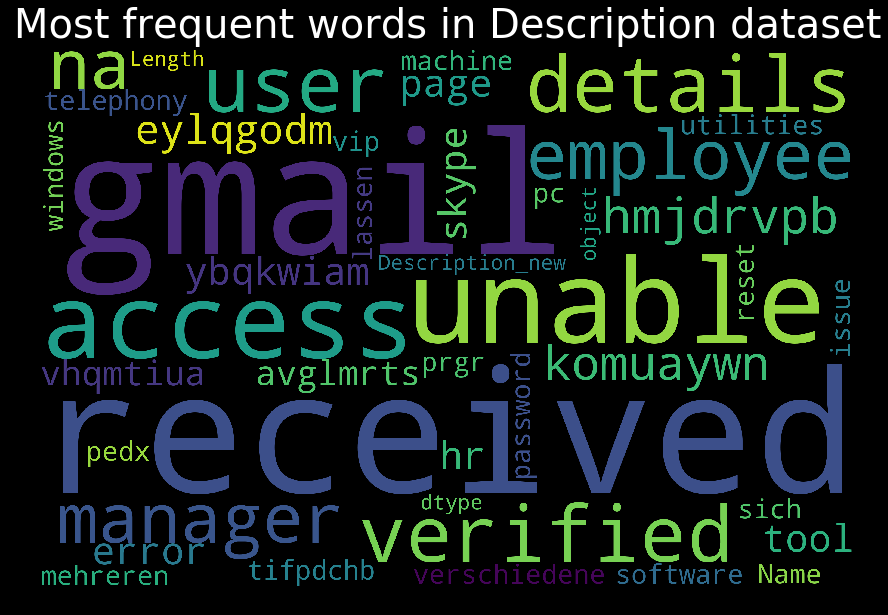

In [27]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(sn_df1['Description_new']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Description dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

In [0]:
def searchRE(regex, value, s):
    #print(regex)
    s = re.sub(regex,value,s)
    return s

### Remove Stop Words

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{"should've", "wouldn't", 'from', 'should', 'can', 'which', 'aren', 'into', 'doing', 'couldn', 'against', 'just', "mightn't", 'be', "shouldn't", "needn't", 'weren', "couldn't", 'yours', 'been', 'why', 'a', 'wouldn', 'mustn', 'through', 'under', "aren't", "hasn't", 'me', 'these', 'had', 'before', 'an', "didn't", 'hadn', 'of', 're', 'further', 'most', 'y', 'each', 't', 'mightn', 'where', 'than', 'are', 'any', 'the', 'does', 'while', 'up', 'but', 'few', 'so', 'm', 'at', 'such', 'off', 'herself', 'yourself', 'isn', 'theirs', 'it', 've', 'wasn', 'when', "wasn't", 'i', 'do', 'other', 'shouldn', 'above', 'after', "she's", "you'll", "won't", "don't", 'd', 'your', 'all', 'both', 'o', 'being', 'over', 'ourselves', "it's", 'those', 'haven', 'for', 'some', 'them', 'they', 'by', 'and', 'because', 'did', "that'll", 'ain', 'if', 'doesn', "you're", 'our', 'you', 'out', 'whom', 'below', 'ours', 'as', 'to', 'down', 'again', 'will', "you've", 's', 'same', 'only', 'himself', "shan't", 'between', "hadn't",

In [0]:
num = ["0","1","2","3","4","5", "6", "7","8", "9", "10","11", "12", "13","14", "15", "16","17", "18", "19","20","21","22","23","24","hello","hi","name",
       "25","26","91","92","93","99","999","...","-",",",":","kennametal.","Kennametal","kennametal.com","\n",")","/s","@","#",".","www","http","com","widia","regards","thanks","thankyou","thank you","best regards","kind regards","ksspl","kennametal india","kennametal mailto","kennametal","hello","bitte","please","received","phone","see","receive","created","team"]
for i in num: 
    stop_words.add(i)

In [35]:
print(stop_words)

{"should've", '10', '92', 'kennametal india', "wouldn't", 'from', 'should', '9', 'can', 'which', '18', 'aren', 'into', 'http', 'doing', 'couldn', 'against', 'just', "mightn't", '11', 'be', "shouldn't", "needn't", 'kennametal mailto', '@', 'weren', '16', "couldn't", 'yours', 'been', 'best regards', 'created', 'why', 'hi', 'a', 'wouldn', 'mustn', '12', 'through', 'under', "aren't", "hasn't", 'me', 'these', 'had', '21', '\n', 'see', '.', 'before', 'an', "didn't", 'hadn', '2', 'of', '24', 're', 'kennametal.com', 'further', 'most', 'y', 'receive', 'each', 't', 'mightn', '23', 'where', 'than', 'are', 'any', '5', 'the', '91', 'does', 'while', '14', 'up', 'but', 'few', 'so', 'm', 'at', '15', 'such', ',', 'off', 'ksspl', 'herself', 'yourself', '-', 'isn', 'theirs', 'it', '3', 've', 'wasn', ')', '93', 'when', "wasn't", 'please', 'widia', 'i', 'do', 'other', 'regards', 'shouldn', 'above', 'after', "she's", "you'll", "won't", 'thank you', "don't", 'team', 'd', 'your', 'all', 'both', 'o', 'being', 

In [0]:
sn_df1['Description_new1'] = sn_df1['Description_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
sn_df1['Short description'] = sn_df1['Short description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [38]:
sn_df1[['Description','Description_new','Description_new1']].head(10)

,Description,Description_new,Description_new1
0,-verified user details.(employee# & manager na...,verified user details employee manager na...,verified user details employee manager checked...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,received from hmjdrvpb komuaywn gmail com...,hmjdrvpb komuaywn gmail meetings skype meeting...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,received from eylqgodm ybqkwiam gmail com...,eylqgodm ybqkwiam gmail cannot log vpn best
3,unable to access hr_tool page,unable to access hr tool page,unable access hr tool page
4,skype error,skype error,skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,unable log engineering tool skype
6,event: critical:hostname_221.company.com the v...,event critical hostname company com the val...,event critical hostname company value mountpoi...
7,ticket_no1550391- employment status - new non-...,ticket no employment status new non employ...,ticket employment status new non employee ente...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,unable disable add ins outlook
9,ticket update on inplant_874773,ticket update on inplant,ticket update inplant


In [0]:
## Update the Description field itself
sn_df1['Description'] = sn_df1['Description_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

### Remove disclaimer text

In [0]:
import re
text1 = "THIS COMMUNICATION IS INTENDED FOR THE SOLE USE OF THE PERSON TO WHOM IT IS ADDRESSED AND MAY CONTAIN INFORMATION THAT IS PRIVILEGED, CONFIDENTIAL AND EXEMPT FROM DISCLOSURE UNDER APPLICABLE LAW. ANY DISSEMINATION, DISTRIBUTION OR DUPLICATION OF THIS COMMUNICATION BY SOMEONE OTHER THAN THE INTENDED RECIPIENT IS STRICTLY PROHIBITED. IF YOUR RECEIPT OF THIS COMMUNICATION IS IN ERROR, PLEASE NOTIFY THE SENDER AND DELETE THIS COMMUNICATION"
sn_df1['Description'] = sn_df1['Description'].apply(lambda x: searchRE(text1,'',x))

In [0]:
text2 = "Select the following link to view the Disclaimer in an alternate language."
sn_df1['Description'] = sn_df1['Description'].apply(lambda x: searchRE(text2,'',x))

<FreqDist with 68 samples and 81 outcomes>


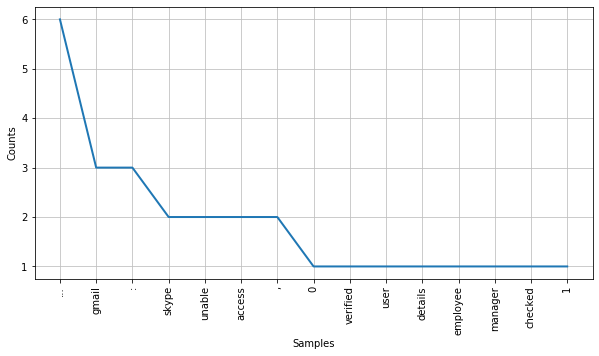

In [44]:
#Creating a sets whith all distinct words for description and plot
plt.figure(figsize = (10,5))
DD=sn_df1['Description']
tokenized_word_DD=word_tokenize(str(DD))
#testing for 10 words so seprated
from nltk.probability import FreqDist
DDfreq = FreqDist(tokenized_word_DD)
print(DDfreq)
topword= DDfreq.most_common(10)
topword
DDfreq.plot(15,cumulative=False)
plt.show()

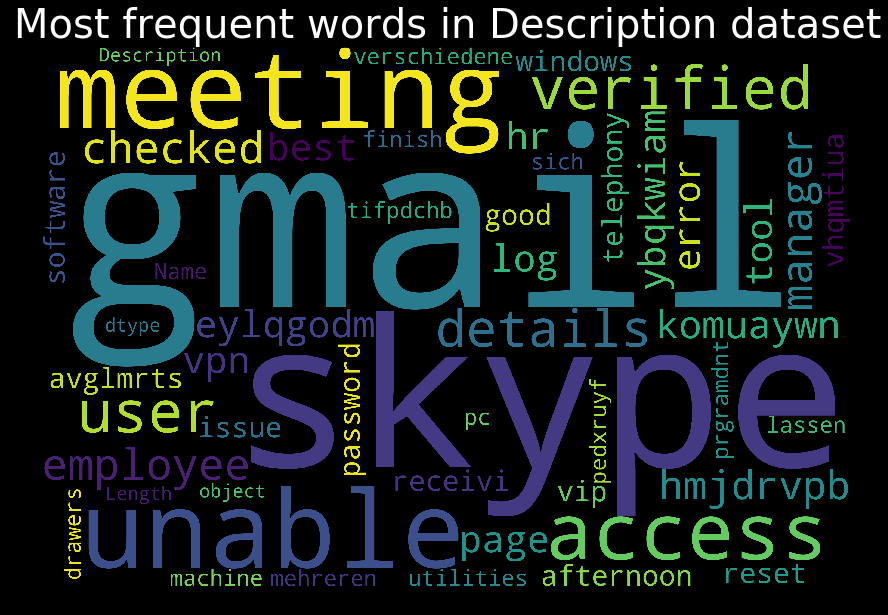

In [45]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(sn_df1['Description']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Description dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

### Feature Engineering

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

Join Short Description and Detailed Description to create a new column called SD - DD

In [0]:
# Join Short Description and Detailed Description to create a new column called SD - DD
sn_df1["SD - DD"] = sn_df1['Short description'].str.cat(sn_df1["Description"], sep= ' - ')

Join Short Description and Detailed Description with Caller to create a new column called SD - DD - Caller

In [49]:
sn_df1.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group',
       'Description_new', 'Description_new1', 'SD - DD'],
      dtype='object')

In [0]:
# Join Short Description and Detailed Description with Caller to create a new column called SD - DD - Caller
sn_df1["SD - DD - Caller"] = sn_df1['SD - DD'].str.cat(sn_df1["Caller"], sep= ' - ')

In [0]:
# Drop the rows that have null values in Assignment Groups
sn_df1 = sn_df1.dropna(subset=["Assignment group"])

# LSTM

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [87]:
train_size = int(len(sn_df1) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(sn_df1) - train_size))

train_x = sn_df1["SD - DD - Caller"][:train_size]
train_y = sn_df1["Assignment Group ID"][:train_size]

test_x = sn_df1["SD - DD - Caller"][train_size:]
test_y = sn_df1["Assignment Group ID"][train_size:]

Train size: 5950
Test size: 2550


In [88]:
# get the raw text data
train_x = train_x.astype(str)
test_x = test_x.astype(str)

y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of y_train tensor:', y_train.shape)
y_test = to_categorical(np.asarray(y_test))
print('Shape of y_test tensor:', y_test.shape)

Shape of y_train tensor: (5950, 74)
Shape of y_test tensor: (2550, 74)


In [0]:
max_words = 10000
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = text.Tokenizer(num_words=max_words, char_level=False)
tokenizer.fit_on_texts(train_x)
sequences_train = tokenizer.texts_to_sequences(train_x)
sequences_test = tokenizer.texts_to_sequences(test_x)

In [91]:
MAX_SEQUENCE_LENGTH = 150

# pad sequences with 0s
X_train = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)

Shape of data tensor: (5950, 150)
Shape of data test tensor: (2550, 150)


In [0]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding, LSTM
from keras.models import Model

In [0]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers
EMBEDDING_DIM = 50
N_CLASSES = 74

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(max_words, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [102]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_6 (Dense)              (None, 74)                9546      
Total params: 601,194
Trainable params: 601,194
Non-trainable params: 0
_________________________________________________________________


In [101]:
history = model.fit(X_train, y_train,
          nb_epoch=10, batch_size=32)

Epoch 1/10
5950/5950 [==============================] - 60s 10ms/step - loss: 0.5288 - acc: 0.8504
Epoch 2/10
5950/5950 [==============================] - 60s 10ms/step - loss: 0.4910 - acc: 0.8620
Epoch 3/10
5950/5950 [==============================] - 60s 10ms/step - loss: 0.4503 - acc: 0.8718
Epoch 4/10
5950/5950 [==============================] - 60s 10ms/step - loss: 0.4001 - acc: 0.8807
Epoch 5/10
5950/5950 [==============================] - 60s 10ms/step - loss: 0.3738 - acc: 0.8914
Epoch 6/10
5950/5950 [==============================] - 60s 10ms/step - loss: 0.3500 - acc: 0.8951
Epoch 7/10
5950/5950 [==============================] - 60s 10ms/step - loss: 0.3135 - acc: 0.9079
Epoch 8/10
5950/5950 [==============================] - 60s 10ms/step - loss: 0.2904 - acc: 0.9118
Epoch 9/10
5950/5950 [==============================] - 59s 10ms/step - loss: 0.2677 - acc: 0.9188
Epoch 10/10
5950/5950 [==============================] - 59s 10ms/step - loss: 0.2541 - acc: 0.9187
